<a href="https://colab.research.google.com/github/jucarmonao/SyS/blob/main/Taller%203/TALLER_SYS_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller teorico-práctico 3 - Proyecto final
#Ecualizador de audio Señales y sistemas 2020-II
### Juan Pablo Carmona Osorio 818019

## 2. Modelado y simulación de sistemas en tiempo

#### 2.1. Respuesta en el tiempo de sistemas lineales e invariantes en el tiempo

###### i) Respuesta al impulso:

Compare la señal de salida obtenida al resolver la EDO con la obtenida mediante la convolución. ¿Son iguales?

Se copia el código y se realiza una resta entre las funciones para determinar si estas son iguales:



/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


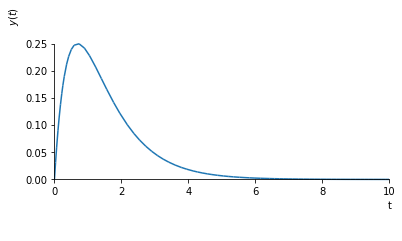

In [24]:
%matplotlib inline
import sympy as sym
sym.init_printing()
tau , t = sym.symbols('tau t' , real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)
ode = sym.Eq(y + y.diff(t) , x)

solution = sym.dsolve(ode.subs(x, sym.exp(-2*t)*sym.Heaviside(t)))
integration_constants = sym.solve( (solution.rhs.limit(t, 0, '-'), solution.rhs.diff(t).limit(t, 0, '-')), 'C1' )
y1 = solution.subs(integration_constants)

h = sym.Function('h')(t)
solution2 = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, h))
integration_constants = sym.solve( (solution2.rhs.limit(t, 0, '-'), solution2.rhs.diff(t).limit(t, 0, '-')), 'C1' )
h = solution2.subs(integration_constants)

y2 = sym.integrate(sym.exp(-2*tau) * h.rhs.subs(sym.Heaviside(t), 1).subs(t, t-tau), (tau, 0, t))
y2
sym.plot(y2, (t,0,10), ylabel=r'$y(t)$',ylim=[-0.1,0.3] );

Se observa que la diferencia entre las funciones es despreciable. Por lo tanto se puede decir que las funciones son iguales.


- Compruebe la solución $h(t)$ de la EDO cuando $x(t)=\delta(t)$ de manera manual. Tener en cuenta que $\frac{d}{dt} \epsilon(t) = \delta(t)$.

Se realiza el cambio de $x(t)=\delta(t)$ 

\begin{equation}
\frac{d}{dt} y(t)+ y(t) = \delta(t)
\end{equation}

Se aplica la transformada de Laplace:

\begin{equation}
\mathscr{L}(\frac{d}{dt} y(t)+ y(t)) = \mathscr{L}(\delta(t))
\end{equation}

Sabiendo que  $y(t)\big\vert_{t=0-}=0$ y $\frac{d}{dt}y(t)\big\vert_{t=0-}=0 $ y que $\mathscr{L}(\delta(t)) = 1$, y haciendo $\mathscr{L}(y(t))= Y(S)$

\begin{equation}
SY(S)+Y(S) = 1\\
Y(S)(1+S)=1\\
Y(S) = \frac{1}{1+S}
\end{equation}

Aplicando la transformada inversa:

\begin{equation}
\mathscr{L}^{-1} = e^{-t}\\
h(t) = e^{-t}
\end{equation}

Se puede evidenciar como el resultado es el mismo.


- Comprobar la solución de la integral de convolución de manera manual.

Siendo la integral de convolución: 

\begin{equation}
y(t) = \int_{0}^{t} x(\tau) \cdot h(t - \tau) \; d\tau
\end{equation}

Se sustituyen con los valores ya conocidos. $h(t) = e^{-t}$

\begin{equation}
y(t) = \int_{0}^{t} e^{\tau} \cdot e^{-(t-\tau)}  \; d\tau \\
y(t) = e^{-t} \int_{0}^{t} e^{-\tau} d\tau\\
y(t) = e^{-t} (-e^{-\tau})\big\vert^{t}_{0} = e^{-t} - e^{-2t}
\end{equation}

## 2.2. Cuaderno de autofunciones

Introduzca $x(t)=e^{s t} $ y $y(t)=\lambda \cdot e^{st}$ en la EDO y calcule manualmente el valor propio $\lambda$. ¿Cómo se relaciona el resultado con el resultado anterior al resolver la EDO?

Inicialmente se calcula el resultado original de la EDO con $x(t)=e^{s t} $ para realizar la comparación.

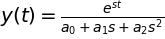

In [16]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, s, a0, a1, a2 = sym.symbols('t s a:3')
x = sym.exp(s * t)
y = sym.Function('y')(t)

ode = sym.Eq(a0*y + a1*y.diff(t) + a2*y.diff(t,2), x)
solution = sym.dsolve(ode)
solution.subs({'C1': 0, 'C2' : 0})

Ahora se hace $x(t)=e^{s t} $ y $y(t)=\lambda \cdot e^{st}$, y posteriormente se despeja $\lambda$

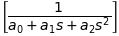

In [17]:
x = sym.exp(s * t)
l = sym.symbols(u"λ")
y = l*sym.exp(s * t)

ode = sym.Eq(a0*y + a1*sym.Derivative(y,t) + a2*sym.Derivative(y,t,2), x)
sym.solve(ode.doit(),l)

De esta manera,

\begin{equation}
\lambda = \frac{1}{a_{0} + a_{1} s + a_{2} s^{2}}
\end{equation}

Se observa como el resultado es el valor escalar asociado a la solución del sistema original.

*¿Puede generalizar sus resultados a una EDO de orden arbitrario?

Sea una EDO de la siguiente manera: 

\begin{equation}
a_0 y(t) + a_1 \frac{d y(t)}{dt} +...+ a_n \frac{d^n y(t)}{dt^n} = x(t)
\end{equation}

La solución para el valor propio del sistema será:

\begin{equation}
\lambda = \frac{1}{a_{0} + a_{1} s +...+ a_{n} s^{n}}
\end{equation}



## 2.3. Ejemplos de modelado de sistemas lineales e invariantes en el tiempo

###### Pendulo elastico

- Cambie el coeficiente de amortiguamiento $c$ del péndulo elástico e indique cómo cambia la magnitud y la fase de la función de transferencia $H(j\omega)$.


Es posible modificar el código escrito en el notebook, para hacer la variable de coeficiente de amortiguamiento interactiva:



In [4]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def pendulo(c_entrada):
 t, m, c, k = sym.symbols('t m c k', real=True)
 x = sym.Function('x')(t)
 y = sym.Function('y')(t)
 
 ode = sym.Eq(m*y.diff(t, 2) + c*y.diff(t) + k*y, x)
 mck = {m: 0.1, c: c_entrada, k: sym.Rational('2.5')}
 solution_h = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, sym.Function('h')(t)))
 integration_constants = sym.solve( (solution_h.rhs.limit(t, 0, '-'), solution_h.rhs.diff(t).limit(t, 0, '-')), ['C1', 'C2'] )
 s = sym.symbols('s')
 H = sym.Function('H')(s)
 H, = sym.solve(ode.subs(x, sym.exp(s*t)).subs(y, H*sym.exp(s*t)).doit(), H)
 w = sym.symbols('omega', real=True)
 Hjw = H.subs(s, sym.I * w)
 sym.plot(abs(Hjw.subs(mck)), (w, -15, 15), ylabel=r'$|H(j \omega)|$', xlabel=r'$\omega$');
 phi = sym.arg(Hjw)
 sym.plot(phi.subs(mck), (w, -15, 15), ylabel=r'$\varphi(j \omega)$', xlabel=r'$\omega$');
    

interact(pendulo, c_entrada=(0.1,1,0.1))

interactive(children=(FloatSlider(value=0.5, description='c_entrada', max=1.0, min=0.1), Output()), _dom_class…

<function __main__.pendulo>

Al modificar el valor del coeficiente de amortiguamiento, cambia la función de transferencia en función de las diferentes frecuencias de resonancia que se pueden presentar. Al disminuir el valor del coeficiente de amortiguamiento aproximándose a cero se puede observar como el sistema atenua de manera más pronunciada, las frecuencias diferentes a las frecuencias de resonancia y acentúa el valor cuando se encuentra en las mismas. Para la fase de la función de transferencia siendo esta su argumento, se observa como el ángulo disminuye para las frecuencias de resonancia al disminuir el coeficiente de amortiguamiento y como crece esta de manera lineal al aumentarla.

- ¿Qué relación hay entre la frecuencia de oscilación y las frecuencias de resonancia?

Las amplitudes de la función de transferencia para la solución estacionaria del oscilador amortiguado dependen de las características físicas del oscilador y de la frecuencia de la fuerza aplicada. Para las frecuencias en donde la función de transferencia son mayores se denominan frecuencias de resonancia y generalemente estas son próximas a la frecuencia natural del sistema.

- Calcule y grafique el desplazamiento para valores dados de $m_\text{I}$ y $r$.

El desplazamiento es: 

\begin{equation}
y(t) = F_0 \cdot \Im \{e^{j \omega t} H(j \omega) \}
\end{equation}

Donde $H(j \omega)$ es:

\begin{equation}
H(j \omega) = \frac{1}{i c \omega + k - m \omega^{2}}
\end{equation}


Se definin las variables de la misma manera que al inicio:

In [20]:
t, m, c, k = sym.symbols('t m c k', real=True)
mck = {m: 0.1, c: sym.Rational('.1'), k: sym.Rational('2.5')}
x = sym.Function('x')(t)
y = sym.Function('y')(t)

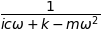

In [21]:
ode = sym.Eq(m*y.diff(t, 2) + c*y.diff(t) + k*y, x)
solution_h = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, sym.Function('h')(t)))
integration_constants = sym.solve( (solution_h.rhs.limit(t, 0, '-'), solution_h.rhs.diff(t).limit(t, 0, '-')), ['C1', 'C2'] )
s = sym.symbols('s')
H = sym.Function('H')(s)
H, = sym.solve(ode.subs(x, sym.exp(s*t)).subs(y, H*sym.exp(s*t)).doit(), H)
w = sym.symbols('omega', real=True)
Hjw = H.subs(s, sym.I * w)
Hjw

In [33]:
def aislamiento(m1,r,w1,w2):
 F0 = m1*r*w2**2
 Hjw1 = Hjw.subs(mck)
 y = F0*sym.im(sym.exp(sym.I*w*t)*Hjw1)   
 sym.plot(y.subs(w,w1), (t, -15, 15), ylabel=r'$X$', xlabel=r'T',ylim=[-15,15]);
interact(aislamiento, w1=(0,10,1), m1=(0,5,1),r=(0,5,1),w2=(0,10,1))

interactive(children=(IntSlider(value=2, description='m1', max=5), IntSlider(value=2, description='r', max=5),…

<function __main__.aislamiento>

- ¿Para qué frecuencias angulares $\omega$ se tiene una mayor magnitud del desplazamiento? ¿Cómo es la relación de fase entre la fuerza externa $F_\text{E}(t)$ y el desplazamiento $y(t)$ en estas frecuencias?


Las mayores magnitudes de desplazamiento se muestran cuando la amplitud de la función es máxima. La amplitud de la función será:

\begin{equation}
A = F_0 \cdot \Im{(H(j \omega))}\\
A = \frac{m_\text{I} r \omega_{2}^2 }{i c \omega + k - m \omega^{2}}
\end{equation}

Para hallar la máxima magnitud en función de la frecuencia angular, se debe calcular la derivada de la función en valor absoluto respecto a $\omega$ y se iguala a 0



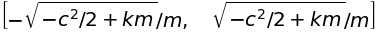

In [34]:
m1, r,w2= sym.symbols('m1 r w2', real=True)
F0 = m1*r*w2**2
a = abs(F0*(Hjw))
extrema = sym.solve(sym.Eq(sym.diff(a, w),0),w)
w0 = extrema[1:3]
w0

Esto se puede comprobar para los valores dados de los parámetros variando la frecuencia angular. Donde $\omega_{1}$ será la frecuencia del pendulo elástico y $\omega_{2}$ la frecuencia de la fuerza externa. 

In [35]:
def aislamiento(m1,r,w1,w2):
 F0 = m1*r*w2**2
 Hjw1 = Hjw.subs(mck)
 y = F0*sym.im(sym.exp(sym.I*w*t)*Hjw1)   
 sym.plot(y.subs(w,w1), (t, -15, 15), ylabel=r'$X$', xlabel=r'T');
 print("Los valores para donde el desplazamiento es máximo son:")
 return ([(w00.subs(mck)).evalf() for w00 in w0])

interact(aislamiento, w1=(0,10,1), m1=(0,5,1),r=(0,5,1),w2=(0,10,1))

interactive(children=(IntSlider(value=2, description='m1', max=5), IntSlider(value=2, description='r', max=5),…

<function __main__.aislamiento>

Se puede observar claramente como la amplitud ($\omega_{1}$) es máxima para el valor calculado. Se enseñan las gráficas de la relación entre la fase de $F_{0}$ y $y(t)$ para estos valores. 

In [36]:
def aislamiento(m1,r,w1,w2):
 F0 = m1*r*w2**2
 Hjw1 = Hjw.subs(mck)
 y = F0*sym.im(sym.exp(sym.I*w*t)*Hjw1)
 a = [(w00.subs(mck)).evalf() for w00 in w0]
 sym.plot(sym.arg(F0/y.subs(w,w1)), (t, -15, 15), ylabel=r'$X$', xlabel=r'T');
 print("El valor máximo de la amplitud sera en w1=" + str(a[1]))
interact(aislamiento, w1=(0.1,10,1), m1=(0,5,1),r=(0,5,1),w2=(0,10,1),label=r'$\varphi(j \omega)$', xlabel=r'$\omega$')

interactive(children=(IntSlider(value=2, description='m1', max=5), IntSlider(value=2, description='r', max=5),…

<function __main__.aislamiento>

Se puede ver que al mover el slider justo en el máximo de la amplitud para $\omega_{1}$, el sentido de la fase cambia. 


- ¿Cómo deben elegirse las frecuencias de resonancia $\omega_0$ del péndulo de resorte para obtener un buen aislamiento de vibraciones para una máquina que gira con frecuencia angular $\omega$? ¿Cómo es la relación de fase entre la fuerza externa $F_\text{E}(t) $ y el desplazamiento $y(t)$ a esta frecuencia?


Un buen sistema aislado será el que menos desplazamiento tenga, por lo tanto se puede hallar el valor mínimo de la función de valor absoluto de amplitud respecto a la frecuencia de la función de transferencia, que serán a su vez, las frecuencias de resonancia. Como se puede observar en las funciones realizadas, la magnitud del desplazamiento es mínimo cuando la frecuencia de la función de transferencia es cercana a cero, por lo tanto, las frecuencias de resonancia deben ser cercanas a 0. Si se ponen estos valores dentro de las funciones realizadas, la relación entre la fase de la fuerza y el desplazamiento es igual para todo el tiempo. 

## 3. Transformada de Laplace

### 3.1. Demuestre las siguientes propiedades (Sin utilizar tabla de propiedades): i) $\mathcal{L}\{x(t-t_o)\}=e^{-st_o}X(s)$; ii) $\mathcal{L}\{x(at)\}=\frac{1}{|a|}X(\frac{s}{a})$; iii) $\mathcal{L}\{\frac{dx(t)}{dt}\}=sX(s)$; iv) $\mathcal{L}\{x(t)*y(t)\}=X(s)Y(s)$

##### i) $\mathcal{L}\{x(t-t_o)\}=e^{-st_o}X(s)$

\begin{equation}
\mathcal{L}\{x(t-t_o)\}=\int_{0}^{\infty}x(t-t_{o})e^{-st}dt
\end{equation}

Se realiza un cambio de variable donde:

$u=t-t_o$   $t=u+t_{o}$

Se realiza el cambio de limites $t\rightarrow \infty = u\rightarrow \infty$ y $t\rightarrow 0 = u\rightarrow -t_o$. Con esto se tiene que:

\begin{equation}
e^{-st_o}\int_{-t_o}^{\infty}x(u)e^{-su}du=e^{-st_o}X(s)
\end{equation}

Así se demuestra satisfactoriamente que:

\begin{equation}
\mathcal{L}\{x(t-t_o)\}=e^{-st_o}X(s)
\end{equation}

##### ii)  $\mathcal{L}\{x(at)\}=\frac{1}{|a|}X(\frac{s}{a})$

Se tiene

\begin{equation}
\mathcal{L}\{x(at)\}=\int_{0}^{\infty}e^{-st}x(at)dt
\end{equation}

Se realiza un cambio de variable $u=at$, así se tiene que:

\begin{equation}
\int_{0}^{\infty}e^{-st}x(at)dt=\frac{1}{c}\int_{0}^{\infty}e^{-s\frac{u}{a}}x(u)du
\end{equation}

Desarrollando esta integral, se llega a:

\begin{equation}
\frac{1}{c}\int_{0}^{\infty}e^{-s\frac{u}{a}}x(u)du=\frac{1}{a}X(\frac{s}{a})
\end{equation}

Donde $a\neq 0$

##### iii) $\mathcal{L}\{\frac{dx(t)}{dt}\}=sX(s)$

Se realiza sustitución:

$u=e^{-st}$   $du=-se^{-st}$ 


$dv=x'(t)$    $v=x(t)$

Así se tiene que:

\begin{equation}
e^{-st}x(t)|_{0}^{\infty}+s\int_{0}^{\infty}e^{-st}x'(t)dt=-x(0)+s\mathcal{L}\{x(t)\}=-x(o)+sX(s)
\end{equation}

\begin{equation}
\mathcal{L}\{\frac{dx(t)}{dt}\}=sX(s)-x(o)
\end{equation}

Si las condiciones iniciales son cero, entonces se tiene que:

\begin{equation}
\mathcal{L}\{\frac{dx(t)}{dt}\}=sX(s)
\end{equation}

Y con esto se ha demostrado satisfactoriamente la propiedad.

##### iv) L{x(t)* y(t)}= X(s)Y(s)

\begin{equation}
\int_{0}^{\infty}(x(t)* y(t))e^{-st}dt
\\ x(t)* y(t)=\int_{0}^{t}x(\tau)g(t-\tau)d\tau
\\ \int_{0}^{\infty}(\int_{0}^{t}x(\tau)g(t-\tau)d\tau)e^{-st}dt
\end{equation}

Por Fubini

\begin{equation}
\int_{0}^{\infty}(\int_{0}^{t}x(\tau)g(t-\tau)d\tau)e^{-st}dt
\end{equation}

Nuevamente por teorema de Fubini

$0<t<\infty$

$0<x<t$

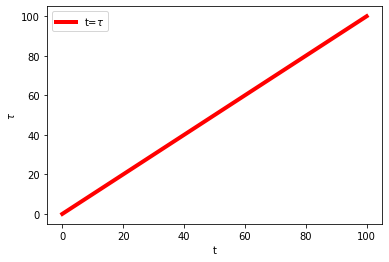

In [37]:
import numpy as np
import matplotlib.pyplot as plt
ti=0
tf=100
Tc=0.01
vec_t = np.arange(ti,tf,Tc)
tau = vec_t
plt.plot(vec_t,tau,'r',linewidth=4,label=r't=$\tau$')
plt.xlabel(r't')
plt.ylabel(r'$\tau$')
plt.legend()
plt.show()

$0<x<\infty$

$x<t<\infty$

\begin{equation}
\int_{0}^{\infty} \int_{\tau}^{\infty}x(\tau)g(t-\tau)e^{-st}dtd\tau
\\=\int_{0}^{\infty}x(\tau) \int_{\tau}^{\infty}y(t-\tau)e^{-st}dtd\tau
\end{equation}

Con $u=t-\tau$, $t=u+\tau$, $dt=du$,

\begin{equation}
\int_{0}^{\infty}x(\tau)\int_{0}^{\infty}y(u)e^{-s(u+\tau)}du d\tau
\\ = \int_{0}^{\infty}x(\tau)e^{-s \tau} \int_{0}^{\infty}y(u)e^{-su}dud\tau 
\end{equation}

Nuevamente por Fubini debido a que cada función depende únicamente de la respectiva variable.

\begin{equation}
\int_{0}^{\infty}x(\tau)e^{-s\tau}d\tau \int_{0}^{\infty}y(u)e^{-su}du
\\= X(s)Y(s)
\end{equation}

### 3.2. Encuentre la transformada de Laplace y dibuje el esquema de polos y ceros y la región de convergencia (ROC), de las siguientes señales: i) $e^{-2t}u(t)+e^{-3t}u(t)$; ii) $e^{2t}u(t)+e^{-3t}u(-t)$; iii)$e^{-a|t|}$; iv)$e^{-2t}[u(t)-u(t-5)]$.

###### i) $\mathcal{L}\{e^{-2t}u(t)+e^{-3t}u(t)\}$

Se tiene entonces que:

\begin{equation}
\mathcal{L}\{e^{-2t}u(t)+e^{-3t}u(t)\}=\mathcal{L}\{e^{-2t}u(t)\}+\mathcal{L}\{e^{-3t}u(t)\}=\int_{-\infty}^{\infty}e^{-2t}u(t)e^{-st}dt+\int_{-\infty}^{\infty}e^{-3t}u(t)e^{-st}dt
\end{equation}

Por los escalones la integral cambiara de limites y se iniciara desde $0$, así:

\begin{equation}
\int_{0}^{\infty}e^{-2t}e^{-st}dt+\int_{0}^{\infty}e^{-3t}e^{-st}dt=\int_{0}^{\infty}e^{-2t-st}dt+\int_{0}^{\infty}e^{-3t-st}dt=\int_{0}^{\infty}e^{-(s+2)t}dt+\int_{0}^{\infty}e^{-(s+3)t}dt=-\frac{e^{-(s+2)t}}{s+2}|_{0}^{\infty}-\frac{e^{-(s+3)t}}{s+3}|_{0}^{\infty}
\end{equation}

Evaluando los limites se llega a:
\begin{equation}
-\frac{e^{-(s+2)t}}{s+2}|_{0}^{\infty}-\frac{e^{-(s+3)t}}{s+3}|_{0}^{\infty}=\frac{1}{s+2}+\frac{1}{s+3}=\frac{2s+5}{(s+2)(s+3)}
\end{equation}

Así se llega a que:

\begin{equation}
\mathcal{L}\{e^{-2t}u(t)+e^{-3t}u(t)\}=\frac{2s+5}{(s+2)(s+3)}
\end{equation}

Donde se encuentra que existe un cero en $-\frac{5}{2}$ y dos polos en $-2$ y $-3$

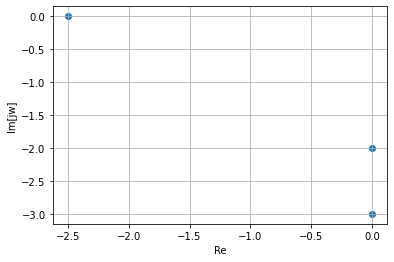

In [38]:
import numpy as np
from matplotlib import pyplot as plt

data = np.array([
    [0, -2],
    [0, -3],
    [-5/2, 0],
])
x, y = data.T

plt.scatter(x,y)
plt.xlabel('Re')
plt.ylabel('Im[jw]')
plt.grid()
plt.show()

###### ii) $\mathcal{L}\{e^{2t}u(t)+e^{-3t}u(-t)\}$

\begin{equation}
\mathcal{L}\{e^{2t}u(t)+e^{-3t}u(-t)\}=\mathcal{L}\{e^{2t}u(t)\}+\mathcal{L}\{e^{-3t}u(t)\}=\int_{-\infty}^{\infty}e^{2t}u(t)e^{-st}dt+\int_{-\infty}^{\infty}e^{-3t}u(t)e^{-st}dt
\end{equation}

Por los escalones la integral cambiara de limites y se iniciara desde $0$, así:

\begin{equation}
\int_{0}^{\infty}e^{2t}e^{-st}dt+\int_{0}^{\infty}e^{-3t}e^{-st}dt=\int_{0}^{\infty}e^{2t-st}dt+\int_{0}^{\infty}e^{-3t-st}dt=\int_{0}^{\infty}e^{-(s-2)t}dt+\int_{0}^{\infty}e^{-(s+3)t}dt=-\frac{e^{-(s-2)t}}{s-2}|_{0}^{\infty}-\frac{e^{-(s+3)t}}{s+3}|_{0}^{\infty}
\end{equation}

Evaluando los limites se llega a:
\begin{equation}
-\frac{e^{-(s-2)t}}{s-2}|_{0}^{\infty}-\frac{e^{-(s+3)t}}{s+3}|_{0}^{\infty}=\frac{1}{s-2}+\frac{1}{s-3}=\frac{2s-1}{(s-2)(s+3)}
\end{equation}

Así se llega a que:

\begin{equation}
\mathcal{L}\{e^{2t}u(t)+e^{-3t}u(t)\}=\frac{2s-1}{(s-2)(s+3)}
\end{equation}

Donde se encuentra que existe un cero en $\frac{1}{2}$ y dos polos en $2$ y $-3$

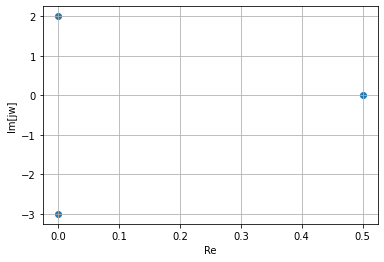

In [2]:
import numpy as np
from matplotlib import pyplot as plt

data = np.array([
    [0, 2],
    [0, -3],
    [1/2, 0],
])
x, y = data.T

plt.scatter(x,y)
plt.xlabel('Re')
plt.ylabel('Im[jw]')
plt.grid()
plt.show()


###### iii)  $\mathcal{L}\{e^{-a|t|}\}$

Se tiene que para que la transformada tenga sentido $a>0$, para que no se genere una indeterminación y por medio del valor absoluto con el cual cuenta $t$, la función cuenta con simetria, por lo tanto los limites de integración iniciaran desde cero y se multiplicarán por dos, así:

\begin{equation}
\mathcal{L}\{e^{-a|t|}\}=2\int_{0}^{\infty}e^{-at}e^{-st}dt=2\int_{0}^{\infty}e^{-(s+a)t}dt=-2\frac{e^{-(s+a)t}}{s+a}|_{0}^{\infty}
\end{equation}

Evaluando los limites:

\begin{equation}
-2\frac{e^{-(s+a)t}}{s+a}|_{0}^{\infty}=\frac{2}
{s+a}
\end{equation}

Se encuentra un polo en $-a$ y ningun cero.

###### iv) $\mathcal{L}\{e^{-2t}[u(t)-u(t-5)]\}$

Por los escalones, los limites cambiaran a $0$ y $5$, que es el espacio donde la señal se encuentra, así:

\begin{equation}
\mathcal{L}\{e^{-2t}[u(t)-u(t-5)]\}=\int_{0}^{5}e^{-2t}e^{-st}dt=\int_{0}^{5}e^{-2t-st}dt=\int_{0}^{5}e^{-(s+2)t}dt=-\frac{e^{-(s+2)t}}{s+2}|_{0}^{5}=-\frac{e^{-(s+2)5}}{s+2}+\frac{1}{s+2}=\frac{1-e^{-(5s+10)}}{s+2}
\end{equation}

Se encuentra un cero en $-2$ y un polo en $-2$

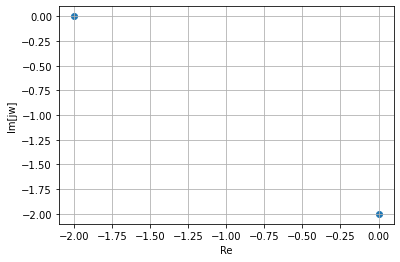

In [40]:
import numpy as np
from matplotlib import pyplot as plt

data = np.array([
    [0, -2],
    [-2, 0],
])
x, y = data.T

plt.scatter(x,y)
plt.xlabel('Re')
plt.ylabel('Im[jw]')
plt.grid()
plt.show()

#### 3.3. Encuentre la función de transferencia en lazo abierto para un circuito RLC serie (entrada de tensión de alimentación - salida de tensión en el capacitor) y un circuito RCL en paralelo (entrada tensión de alimentación - salida corriente en el inductor). 
NOTA: : tenga en cuenta las condiciones iniciales del sistema segun lo explicado en los cuadernos de Python de la sección 4 del repositorio del curso.

Serie 
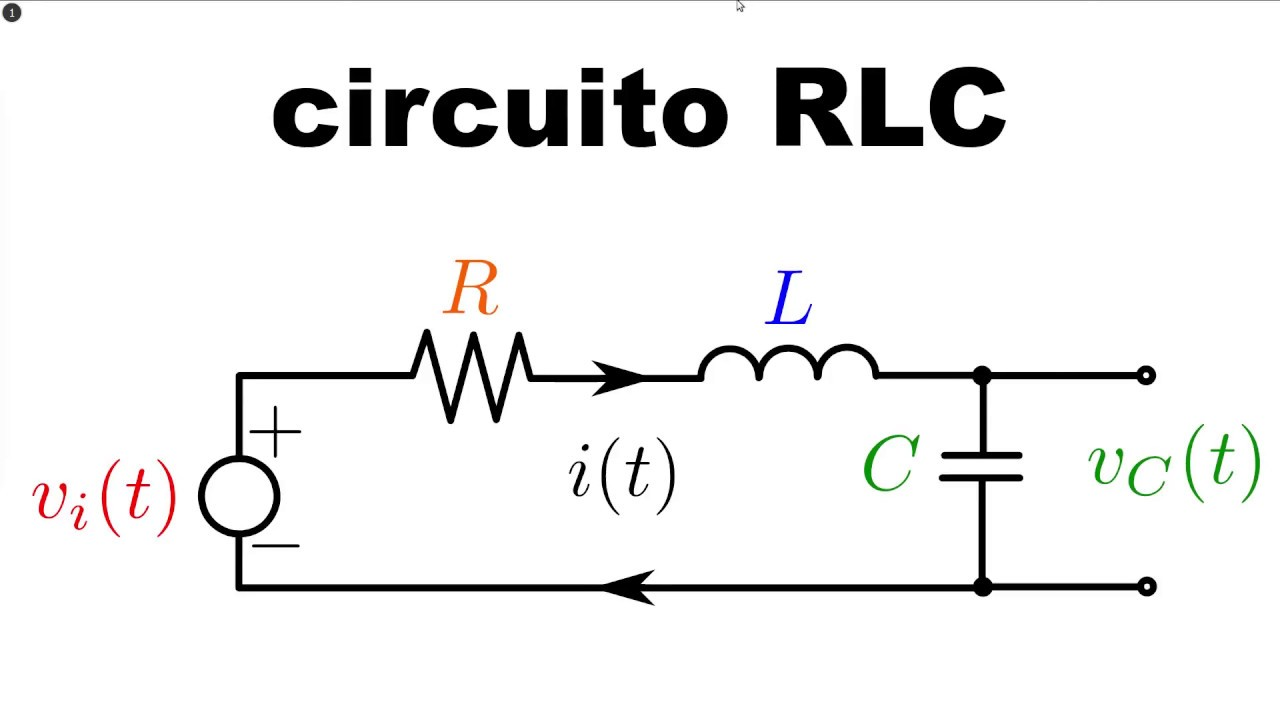




Sabiendo que $i(t)=i_c(t)=\dfrac{cdV_C(t)}{dt}$,  $v_L(t)=\dfrac{Ldi(t)}{dt}=\dfrac{LcdV_C(t)}{dt^{2}}$

\begin{equation}
x(t)=V_R(t)+V_L(t)+V_C(t)
\\x(t)=\dfrac{RCdV_C(t)}{dt} + \dfrac{LCd^2V_C(t)}{dt^2} + V_C(t)
\end{equation}

Tomando $a_2=LC$, $a_1=RC$, $a_0=1$:

\begin{equation}
x(t)=\dfrac{a_2d^2V_C(t)}{dt^2} + \dfrac{a_1dV_C(t)}{dt} + a_0V_C(t)
\end{equation}

\begin{equation}
X(s)= a_2(s^2V_C(s) - sV_C(0) - V'_C(0)) + a_1(sV_C(s)-V(0)) + a_0V_C(s)
\end{equation}

Según el Github $V_C(0)=-1$ por lo que es la unica que nos interesa, y la del inductor se descarta, y ademas por lo tanto la segunda derivada seria $V'_C(0)=0$

Con este reemplazo encontraremos dos respuestas, una respuesta externa $x(t){ext}$, la cual solo depende de la entrada del sistema y una respuesta interna $x(t){int}$, la cual solo depende de las condiciones iniciales, juntas tendremos una respuesta total del sistema expresada como la funcion de transferencia por la entrada, sumandoce con las condiciones iniciales, esto se observara en el analicis a continuacion.

\begin{equation}
X(s)=a_2s^2V_C(s) + a_2s + a_1sV_C(s) + a_1 + a_0V_C(s)
\\X(s)=a_2s^2V_C(s) + (a_1V_C(s) - a_2)s + a_0V_C(s)
\\X(s)=a_2s^2V_C(s) + a_1sV_C(s) + a_2s + a_0V_C(s) + a_1
\\V_C(s)= \dfrac{X(s) - a_2s - a_1}{a_2s^2 + a_1s + a_0}
\\V_C(s)= \dfrac{X(s)}{a_2s^2 + a_1s + a_0} - \dfrac{a_2s + a_1}{a_2s^2 + a_1s + a_0}
\end{equation}

Volviendo a reemplazar las variables con $a_2=LC$, $a_1=RC$ y $a_0=1$

Podemos observar como nos queda expresada la funcion de transferencia multiplicada por la entrada y la suma del resultado de aplicar las condiciones iniciales segun explicdo en el repositorio del curso.

\begin{equation}
V_C(s)= \dfrac{X(s)}{LCs^2 + RCs + 1} - \dfrac{LCs + RC}{LCs^2 + RCs + 1}
\end{equation}



*PARALELO*

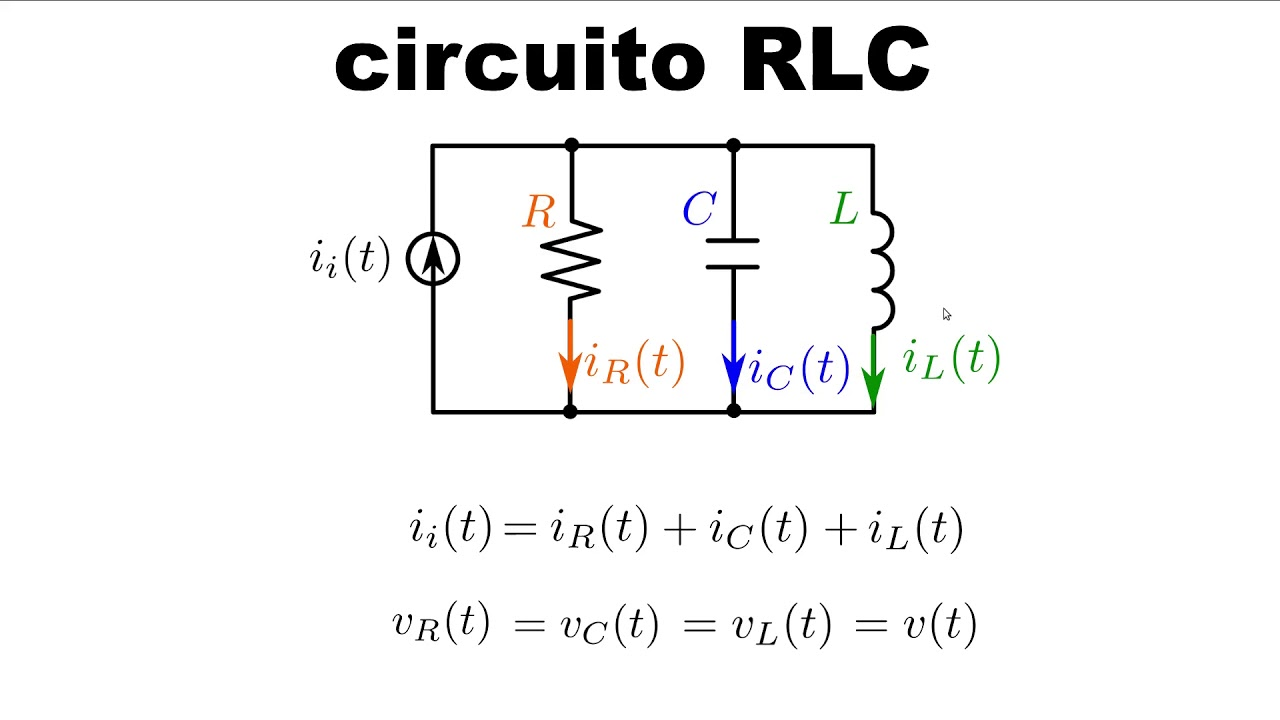



\begin{equation}
V_R(t)=V_C(t)=V_L(t)
x(t)=i_R(t)+i_L(t)+i_C(t)
\\x(t)=\dfrac{Ldi_L(t)}{Rdt} + \dfrac{CLd^2i_L(t)}{dt^2} + i_L(t)
\\x(t)=\dfrac{CLd^2i_L(t)}{dt^2} + \dfrac{Ldi_L(t)}{Rdt} + i_L(t)
\\x(t)=\dfrac{a_2d^2i_L(t)}{dt^2} + \dfrac{a_1di_L(t)}{dt} + \dfrac{a_0iL(t)}{dt}
\end{equation}

Con $i_L(+0)=0$ ya que es la unica que nos interesa por que la del condensador se descarta y tomando $a_2=LC$, $a_1=RC$, $a_0=1$ tendriamos que:

\begin{equation}
X(s)= a_2(s^2I_L(s) - sI_L(0) - I_L(0)) + a_1(sI_L(s) - I_L(0)) + a_0I_L(s)
\\X(s)= a_2s^2I_L(s) + a_1sI_L(s) + a_0I_L(s)
\\I_L(s)= \dfrac{X(s)}{a_2s^2 + a_1s + a_0^-}
\end{equation}

Tendriamos ya solo que devolver nuestras variables que reemplazamos a las originales y tendriamos como resultado que nuestra funcion de transferencia estaria dada por:

\begin{equation}
I_L(s)= \frac{X(s)}{CLs^2 + \frac{L}{R}s + 1}
\end{equation}

y Gracias a que las condiciones iniciales fueron cero, se puede observar mejor que en el caso pasado teniendo como resultado:
\begin{equation}
\\H(s)= \dfrac{1}{CLs^2 + \frac{L}{R}s + 1}
\end{equation}

### 3.4. Para las funciones de transferencia encontradas en el punto anterior, encuentre la expresión de la salida en el tiempo, en función de R, L, C, y las condiciones iniciales, para las siguientes entradas: i) impulso, ii) escalón unitario, y iii) rampa. Compruebe los resultados en simulación sobre Python (utililzando sympy) y grafique la señal de salida para cada caso.

con entrada $\delta(t)$

\begin{equation}
\mathscr{L}\{\delta(t)\} = \mathscr{L^{-1}}\{X(s)\}
\\V_C(s)=\dfrac{1}{LCs^2 + RCs + 1} - \dfrac{LCs + RC}{LCs^2 + RCs + 1}
\\V_C(s)=\dfrac{1}{LCs^2 + RCs + 1} - \dfrac{LCs}{LCs^2 + RCs + 1} - \dfrac{RC}{LCs^2 + RCs + 1}
\end{equation}
al dividir la expresion, podremos encontrar la transformada inversa de cada una, y con eso tendriamos la transformada inversa total.

empezaremos con la primera expresión

\begin{equation}
\\\mathscr{L^{-1}}\{\dfrac{1}{LCs^2 + RCs + 1}\}=
\\\mathscr{L^{-1}}\{\dfrac{\dfrac{1}{LC}}{s^2 + \dfrac{Rs}{L} + \dfrac{1}{LC}}\}=
\end{equation}

Con $\dfrac{1}{LC}= a$, $\dfrac{R}{L}=b$ y procedemos a completar cuadrados para poder resolver el problema

\begin{equation}
\mathscr{L^{-1}}\{\dfrac{a}{(s + \dfrac{b}{2})^2 - a - \dfrac{b^2}{4}}\}
\end{equation}
Y multiplicaremos y dividiremos por una constante para poder hacer la transformada inversa de acuerdo a las tablas de transformadas.
\begin{equation}
\mathscr{L^{-1}}\{\dfrac{a}{(s + \dfrac{b}{2})^2 - a - \dfrac{b^2}{4}}\}\frac{\sqrt{a - \dfrac{b^2}{4}}}{\sqrt{a - \dfrac{b^2}{4}}}=
\dfrac{asin(\sqrt{a - \dfrac{b^2}{4}})}{\sqrt{a - \dfrac{b^2}{4}}} e^{\dfrac{b}{2}t}\\
\\
\end{equation}

Ahora procederemos a hacer la segunda parte de la transformada inversa.
\begin{equation}
\\\mathscr{L^{-1}}\{\dfrac{LCs}{LCs^2 + RCs + \dfrac{1}{LC}}\} = \mathscr{L^{-1}}\{\dfrac{s}{s^2 + \dfrac{R}{L}s + \dfrac{1}{LC}}\}
\end{equation}
Con $b=\dfrac{R}{L}$, $a=\dfrac{1}{LC}$
\begin{equation}
\\\mathscr{L^{-1}}\{\dfrac{s}{(s + \dfrac{b}{2})^2 + a - \dfrac{b^2}{4}}\}\\
\end{equation}

y aplicando las tablas de transformadas, podremos encontrar esta transformada inversa con facilidad

\begin{equation}
cos(\sqrt{a - \dfrac{b^2}{4}}t)e^{\dfrac{b}{2}t}
\end{equation}

Ahora se encontrara la transformada inversa de la ultima parte.
\begin{equation}
\\\mathscr{L^{-1}}\{\dfrac{RC}{LCs^2 + RCs + 1}\} = \mathscr{L^{-1}}\{\dfrac{\dfrac{R}{L}}{s^2 + \dfrac{R}{L}s + \dfrac{1}{LC}}\}
\\\mathscr{L^{-1}}\{\dfrac{b}{(s + \dfrac{b}{2})^2 + a - \dfrac{b^2}{4}}\}
\end{equation}
Y multiplicaremos y dividiremos por una constante para poder hacer la transformada inversa de acuerdo a las tablas de transformadas.
\begin{equation}
\\= bsin(\sqrt{a - \dfrac{b^2}{4}}t) \dfrac{e^{\dfrac{b}{2}t}}{\sqrt{a - \dfrac{b^2}{4}}}
\end{equation}

Ahora juntaremos todas las expresiones y luego de hacer esto, regresaremos las variables a su estado natural, y esto nos dara como respuesta la respuesta del circuito con entrada impulso.
\begin{equation}
\\V_C(t)= \dfrac{asin(\sqrt{a - \dfrac{b^2}{4}})e^{\dfrac{b}{2}t}}{\sqrt{a - \dfrac{b^2}{4}}} + cos(\sqrt{a - \dfrac{b^2}{4}})e^{\dfrac{b}{2}t} + \dfrac{bsin(\sqrt{a - \dfrac{b^2}{4}})}{\sqrt{a - \dfrac{b^2}{4}}}
\\V_C(t)= \dfrac{(a + b)sin(\sqrt{a - \dfrac{b^2}{4}}t)e^{\dfrac{b}{2}t}}{\sqrt{a - \dfrac{b^2}{4}}} + cos(\sqrt{a - \dfrac{b^2}{4}})e^{\dfrac{b}{2}t}
\\V_C(t)= \dfrac{(\dfrac{1}{LC} + \dfrac{R}{L})sin(\sqrt{\dfrac{1}{LC} - \dfrac{R^2}{4L^2}}t)e^{\dfrac{R}{2L}t}}{\sqrt{\dfrac{1}{LC} - \dfrac{R^2}{4L^2}}} + cos(\sqrt{\dfrac{1}{LC} - \dfrac{R^2}{4L^2}}t)e^{\dfrac{R}{2L}t}
\end{equation}

Ahora si nos damos cuenta, la entrada solo va a afectar la primera parte de la expresion, por lo tanto la transformada de las otras dos se mantendran para los otros casos, así que tomaremos dicha parte y la guararemos en una variable para poder ser utilizada en las siguientes expresiones.

\begin{equation}
\\B= \dfrac{\dfrac{R}{L}sin(\sqrt{\dfrac{1}{LC} - \dfrac{R^2}{4L^2}}t)e^{\dfrac{R}{2L}t}}{\sqrt{\dfrac{1}{LC} - \dfrac{R^2}{4L^2}}} + cos(\sqrt{\dfrac{1}{LC} - \dfrac{R^2}{4L^2}}t)e^{\dfrac{R}{2L}t}
\end{equation}


con entrada $u(t)$

Analizaremos solo la parte que se ve afectada y luego completaremos la respuesta con lo encontrado en puntos anteriores:

\begin{equation}
\mathscr{L}\{u(t)\}= \dfrac{1}{s}
\\V_C(s)= \dfrac{1}{LCs^2 + RCs + 1} \dfrac{1}{s} - \dfrac{LCs + RC}{LC^2 + RCs +1}
\\\mathscr{L^{-1}}\{\dfrac{1}{LCs^2 + RCs + 1}\dfrac{1}{s}\}
\end{equation}

Aplicaremos la propiedad de la convolucion en la que tenemos que:
\begin{equation}
\\\mathscr{L^{-1}}\{\dfrac{1}{LCs^2 + RCs + 1} * \mathscr{L^{-1}}\{\dfrac{1}{s}\}
\end{equation}
Y como ya conocemos la transformada inversa de la primera expresión gracias al punto pasado, tendriamos como resultado que:
\begin{equation}
\\\dfrac{sin(\sqrt{\dfrac{1}{LC} - \dfrac{R^2}{4L^2}}t) e^{\dfrac{R}{2L}t}}{LC \sqrt{\dfrac{1}{LC} - \dfrac{R^2}{4L^2}}} * 1
\end{equation}
Seguimos aplicando convolucion con lo que tendriamos como respuesta:
\begin{equation}
\\= \int_0^t \dfrac{sin(\sqrt{\dfrac{1}{LC} - \dfrac{R^2}{4L^2}}\tau) e^{\dfrac{R}{2L}\tau}}{LC \sqrt{\dfrac{1}{LC} - \dfrac{R^2}{4L^2}}} d\tau
\\a=\sqrt{\dfrac{1}{LC} - \dfrac{R^2}{4L^2}}
\\A =\dfrac{\dfrac{R}{2L}e^{\dfrac{R}{2L}t} sin(at) - ae^{\dfrac{R}{2L}t}cos(at) + a}{a((\dfrac{R}{2L})^2 + a)}
\end{equation}
Y la respuesta final estaria dada por la expresión con entrada escalon seria::
\begin{equation}
\\V_C(t)= A + B
\\V_C(t) = \dfrac{\dfrac{R}{2L}e^{\dfrac{R}{2L}t} sin(at) - ae^{\dfrac{R}{2L}t}cos(at) + a}{a((\dfrac{R}{2L})^2 + a)} + \dfrac{\dfrac{R}{L}sin(\sqrt{\dfrac{1}{LC} - \dfrac{R^2}{4L^2}}t)e^{\dfrac{R}{2L}t}}{\sqrt{\dfrac{1}{LC} - \dfrac{R^2}{4L^2}}} + cos(\sqrt{\dfrac{1}{LC} - \dfrac{R^2}{4L^2}}t)e^{\dfrac{R}{2L}t}\\
\end{equation}

Con entrada $t$
Analizaremos solo la parte que se ve afectada y luego completaremos la respuesta con lo encontrado en puntos anteriores:
\begin{equation}
\mathscr{L}\{t\} = \dfrac{1}{s^2}
\\V_C(s)= \dfrac{1}{LCs^2 + RCs + 1} \dfrac{1}{s^2} - \dfrac{LCs + RC}{LC^2 + RCs + 1}
\\\mathscr{L^{-1}}\{\dfrac{1}{LCs^2 + RCs + 1} \dfrac{1}{s^2}\}
\end{equation}
Aplicaremos la de nuevo la propiedad de convolucion:
\begin{equation}
\\\mathscr{L^{-1}}\{\dfrac{1}{LCs^2 + RCs + 1} * \mathscr{L^{-1}}\{\dfrac{1}{s^2}\}
\end{equation}
Y como ya conocemos la primera transformada inversa gracias al primer punto resuelto, tendriamos comor esultado que:
\begin{equation}
\\\dfrac{sin(\sqrt{\dfrac{1}{LC} - \dfrac{R^2}{4L^2}}t) e^{\dfrac{R}{2L}t}}{LC \sqrt{\dfrac{1}{LC} - \dfrac{R^2}{4L^2}}} * t
\end{equation}
Continuamos aplicando convolucion:
\begin{equation}
\\\int_0^t \dfrac{sin(\sqrt{\dfrac{1}{LC} - \dfrac{R^2}{4L^2}} \tau) e^{\dfrac{R}{2L} \tau}}{LC \sqrt{\dfrac{1}{LC} - \dfrac{R^2}{4L^2}}} (t - \tau) d\tau
\\a=\sqrt{\dfrac{1}{LC} - \dfrac{R^2}{4L^2}}
\\b = \frac{R}{2L}
\\C= \dfrac{(b^2 - a^2)e^{bt} sin(at) - 2abe^{bt}cos(at) + (ab^2 + a^3)t + 2ab}{(ab^4 + 2a^3b^2 + a^5)LC}
\end{equation}

Conociendo ya el valor de esta transformada inversa, la respuesta total con entrada rampa seria igual a:

\begin{equation}
\\V_C(t)= C + B
\\V_C(t) = \dfrac{(b^2 - a^2)e^{bt} sin(at) - 2abe^{bt}cos(at) + (ab^2 + a^3)t + 2ab}{LC(ab^4 + 2a^3b^2 + a^5)} + \dfrac{\dfrac{R}{L}sin(\sqrt{\dfrac{1}{LC} - \dfrac{R^2}{4L^2}}t)e^{\dfrac{R}{2L}t}}{\sqrt{\dfrac{1}{LC} - \dfrac{R^2}{4L^2}}} + cos(\sqrt{\dfrac{1}{LC} - \dfrac{R^2}{4L^2}}t)e^{\dfrac{R}{2L}t}\\
\end{equation}

Teniendo en cuenta la función de transferencia encontrada en el punto anterior para el circuito $RLC$ en paralelo:

\begin{equation}
I_{l}(s)=\frac{X(s)}{CLs^{2}+\frac{L}{R}s+1}
\end{equation}

En principio, para facilitar los calculos en el denominador se factoriza el $CL$, se tiene así:

\begin{equation}
I_{l}(s)=\frac{1}{CL}\frac{X(s)}{s^{2}+\frac{1}{RC}s+\frac{1}{CL}}
\end{equation}

Ahora, para cada una de las entradas:

###### i) Impulso unitario:

Entonces, se busca en un principio la transformada de esta función para realizar la entrada, entonces:

\begin{equation}
X(s)=\mathcal{L}\{\delta (t)\}=1
\end{equation}

Entonces se tiene para la función $I_{l}(t)$, reescribiendo la expresión inicial con el nuevo $X(s)$:

\begin{equation}
I_{l}(s)=\frac{1}{CL}\frac{1}{s^{2}+\frac{1}{RC}s+\frac{1}{CL}}
\end{equation}

Para llevar esta expresión a una transformada conocida, se procede a completar cuadrados en el denominador:

\begin{equation}
I_{l}(s)=\frac{1}{CL}\frac{1}{s^{2}+\frac{1}{RC}s+\frac{1}{CL}}=(\frac{1}{CL})\frac{1}{s^{2}+\frac{1}{RC}s+\frac{1}{CL}+\frac{1}{4R^{2}C^{2}}-\frac{1}{4R^{2}C^{2}}}=(\frac{1}{CL})\frac{1}{(s+\frac{1}{2RC})^{2}+(\frac{1}{CL}-\frac{1}{4R^{2}C^{2}})}
\end{equation}

Esta ecuación viene tomando forma similar a la siguiente transformada conocida:

\begin{equation}
\mathcal{L}\{e^{-at}\sin(\omega t)\}=\frac{\omega}{(s+a)^{2}+\omega^{2}}
\end{equation}

Para llevar la expresión a la forma de esta transformada, se realiza:

\begin{equation}
I_{l}(s)=(\frac{1}{CL\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}}})\frac{\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}}}{(s+\frac{1}{2RC})^{2}+(\frac{1}{CL}-\frac{1}{4R^{2}C^{2}})}
\end{equation}

Entonces:

\begin{equation}
I_{l}(t)=(\frac{1}{CL\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}}})e^{-\frac{1}{2RC}t}\sin(\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}}t)
\end{equation}




Entrada impulso en serie 

In [41]:

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)
def rnatural(r,l,c):  
    RLC = { R: r, L: sym.Rational(l), C: sym.Rational(c)}
    Yext = 1/(L*C*s**2 + R*C*s + 1) * X
    yext = sym.inverse_laplace_transform(Yext.subs(RLC).subs(X, 1), s, t)
    Yint = -(R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) 
    yint = sym.inverse_laplace_transform(Yint.subs(RLC), s, t)
    y = yext + yint
    p1 = sym.plot(yext, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
    p2 = sym.plot(yint, (t, 0, 5), line_color='g', show=False)
    p3 = sym.plot(y, (t, 0, 5), line_color='r', show=False)
    p1.extend(p2)
    p1.extend(p3)
    p1.show()
    print("Resultado transformada inversa")
    return sym.simplify(y)


interact(rnatural,r=(1,10,1),l=(0.1,1,0.1),c=(0.1,1,0.1))

interactive(children=(IntSlider(value=5, description='r', max=10, min=1), FloatSlider(value=0.5, description='…

<function __main__.rnatural>

Entrada impulso en paralelo

In [5]:
import sympy as sym
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)
def rnatural(r,l,c):  
    RLC = { R: r, L: sym.Rational(l), C: sym.Rational(c)}
    Y = 1/(L*C*s**2 + (L/R)*s + 1) * X
    y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1), s, t)
    p1 = sym.plot(y, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$',ylim=[-3,3], show=False)
    p2 = sym.plot(y, (t, 0, 5), line_color='r',ylim=[-3,3], show=False)
    p1.extend(p2)
    p1.show()
    print("y la transformada inversa nos daria como resultado")
    return sym.simplify(y)


interact(rnatural,r=(1,10,1),l=(0.1,1,0.1),c=(0.1,1,0.1))

interactive(children=(IntSlider(value=5, description='r', max=10, min=1), FloatSlider(value=0.5, description='…

<function __main__.rnatural>

###### ii) Función escalón $u(t)$:

Buscando la transformada de esta entrada:

\begin{equation}
X(s)=\mathcal{L}\{u(t)\}=\frac{1}{s}
\end{equation}

Se puede ahorrar trabajo al ya tener una expresión relacionada a una transformada del punto anterior, donde, al multiplicar por la transformada de la nueva entrada, se convierte en una convolusión:

\begin{equation}
I_{l}(s)=\frac{X(s)}{CL}\frac{1}{s^{2}+\frac{1}{RC}s+\frac{1}{CL}}=(\frac{1}{CL\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}}})\frac{\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}}}{(s+\frac{1}{2RC})^{2}+(\frac{1}{CL}-\frac{1}{4R^{2}C^{2}})}X(s)=(\frac{1}{CL\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}}})\frac{\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}}}{(s+\frac{1}{2RC})^{2}+(\frac{1}{CL}-\frac{1}{4R^{2}C^{2}})}(\frac{1}{s})
\end{equation}

Se sabe entonces que:

\begin{equation}
\mathcal{L}^{-1}\{X(s)Y(s)\}=x(t)*y(t)=\int_{0}^{t}x(\tau)y(t-\tau)d\tau
\end{equation}

Entonces así se tiene que:

\begin{equation}
x(t)=1 
\end{equation}
\begin{equation}
y(t)= e^{-\frac{1}{2RC}t}\sin(\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}}t)
\end{equation}

Entonces la convolución para la señal será:

\begin{equation}
I_{l}(t)=(\frac{1}{CL\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}}})\int_{0}^{t}e^{-\frac{1}{2RC}\tau}\sin(\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}}\tau)d\tau
\end{equation}

Resolviendo la integral:

\begin{equation}
I_{l}(t)=(\frac{1}{CL\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}}})(\frac{L\sqrt{\frac{4R^{2}C-L}{L}}}{2R}-\frac{e^{-\frac{1}{2RC}t}(L\sin(\frac{\sqrt{\frac{4RC^{2}-L}{L}}t}{2RC})+L\sqrt{\frac{4RC^{2}-L}{L}}\cos(\frac{\sqrt{\frac{4RC^{2}-L}{L}}t}{2RC}))}{2R})
\end{equation}



Escalon en serie 

In [8]:
s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)
def rnatural(r,l,c):  
    RLC = { R: r, L: sym.Rational(l), C: sym.Rational(c)}
    Yext = 1/(L*C*s**2 + R*C*s + 1) * X
    yext = sym.inverse_laplace_transform(Yext.subs(RLC).subs(X, 1/s), s, t)
    Yint = -(R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) 
    yint = sym.inverse_laplace_transform(Yint.subs(RLC), s, t)
    y = yext + yint
    p1 = sym.plot(yext, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$',ylim=[-3,3], show=False)
    p2 = sym.plot(yint, (t, 0, 5), line_color='g',ylim=[-3,3], show=False)
    p3 = sym.plot(y, (t, 0, 5), line_color='r',ylim=[-3,3], show=False)
    p1.extend(p2)
    p1.extend(p3)
    p1.show()
    print("Resultado transformada inversa")
    return sym.simplify(y)


interact(rnatural,r=(1,10,1),l=(0.1,1,0.1),c=(0.1,1,0.1))

interactive(children=(IntSlider(value=5, description='r', max=10, min=1), FloatSlider(value=0.5, description='…

<function __main__.rnatural>

Escalon en paralelo

In [10]:
s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)
def rnatural(r,l,c):  
    RLC = { R: r, L: sym.Rational(l), C: sym.Rational(c)}
    Y = 1/(L*C*s**2 + (L/R)*s + 1) * X
    y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1/s), s, t)
    p1 = sym.plot(y, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$',ylim=[0,3], show=False)
    p2 = sym.plot(y, (t, 0, 5), line_color='r',ylim=[0,3], show=False)
    p1.extend(p2)
    p1.show()
    print("y la transformada inversa nos daria como resultado")
    return sym.simplify(y)


interact(rnatural,r=(1,10,1),l=(0.1,1,0.1),c=(0.1,1,0.1))

interactive(children=(IntSlider(value=5, description='r', max=10, min=1), FloatSlider(value=0.5, description='…

<function __main__.rnatural>

###### iii) Función rampa $x(t)=t$:

La transformada de esta función viene dada por:

\begin{equation}
X(s)=\mathcal{L}\{t\}=\frac{1}{s^{2}}
\end{equation}

Se puede ahorrar trabajo al ya tener una expresión relacionada a una transformada del primer punto, donde, al multiplicar por la transformada de la nueva entrada, se convierte en una convolusión:

\begin{equation}
I_{l}(s)=\frac{X(s)}{CL}\frac{1}{s^{2}+\frac{1}{RC}s+\frac{1}{CL}}=(\frac{1}{CL\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}}})\frac{\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}}}{(s+\frac{1}{2RC})^{2}+(\frac{1}{CL}-\frac{1}{4R^{2}C^{2}})}X(s)=(\frac{1}{CL\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}}})\frac{\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}}}{(s+\frac{1}{2RC})^{2}+(\frac{1}{CL}-\frac{1}{4R^{2}C^{2}})}(\frac{1}{s^{2}})
\end{equation}

E igual como en el anterior punto, se realiza la convolución, ya que se conocen las transformadas inversas de cada una de las dos funciones:

\begin{equation}
x(t)=t 
\end{equation}
\begin{equation}
y(t)= e^{-\frac{1}{2RC}t}\sin(\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}}t)
\end{equation}

Entonces la convolución para la señal será:

\begin{equation}
I_{l}(t)=(\frac{1}{CL\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}}})\int_{0}^{t}e^{-\frac{1}{2RC}\tau}\sin(\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}}\tau)(t-\tau)d\tau
\end{equation}

Realizando la integral se da que:

\begin{equation}
I_{l}(t)=(\frac{1}{CL\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}}})(-\frac{e^{-(\frac{1}{2RC})t}(((\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}})^{2}-(\frac{1}{2RC})^{2})\sin(\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}}t)-2(\frac{1}{2RC})(\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}})\cos(\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}}t)-te^{\frac{1}{2RC}t}(\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}})^{3}+(\frac{1}{RC}-(\frac{1}{2RC})^{2}t)e^{\frac{1}{2RC}t}\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}})}{(\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}})^{4}+2(\frac{1}{2RC})^{2}(\sqrt{\frac{1}{CL}-\frac{1}{4R^{2}C^{2}}})^{2}+(\frac{1}{2RC})^{4}})
\end{equation}

Función rampa en serie

In [11]:
s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)
def rnatural(r,l,c):  
    RLC = { R: r, L: sym.Rational(l), C: sym.Rational(c)}
    Yext = 1/(L*C*s**2 + R*C*s + 1) * X
    yext = sym.inverse_laplace_transform(Yext.subs(RLC).subs(X, 1/s**2), s, t)
    Yint = - (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) 
    yint = sym.inverse_laplace_transform(Yint.subs(RLC), s, t)
    return yext


interact(rnatural,r=(1,10,1),l=(0.1,1,0.1),c=(0.1,1,0.1))

interactive(children=(IntSlider(value=5, description='r', max=10, min=1), FloatSlider(value=0.5, description='…

<function __main__.rnatural>

Función rampa en paralelo

In [12]:
s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)
def rnatural(r,l,c):  
    RLC = { R: r, L: sym.Rational(l), C: sym.Rational(c)}
    Y = 1/(L*C*s**2 + (L/R)*s + 1) * X
    y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1/(s**2)), s, t)
    return y


interact(rnatural,r=(1,10,1),l=(0.1,1,0.1),c=(0.1,1,0.1))

interactive(children=(IntSlider(value=5, description='r', max=10, min=1), FloatSlider(value=0.5, description='…

<function __main__.rnatural>

En este caso no podemos comprobarlo ya que sympy no es capáz de realizar la simulación

### 3.5. Consulte en qué consiste un sistema subamortiguado, sobre amortiguado y de amortiguamiento critico. Generé simulaciones para ejemplificar cada uno de los casos con los sistemas R, L, C serie y paralelo estudiados. 
NOTA: asuma condiciones iniciales cero.

El tener la ecuación de un circuito RLC, en este caso en serie, se forma una ecuación diferencial de segundo orden de esta forma:

\begin{equation}
L\frac{d^{2}i(t)}{dt^{2}}+R\frac{di(t)}{dt}+\frac{1}{C}i(t)
\end{equation}

Para facilitar la resolución de este ejercicio se deja la mayo derivada con coeficiente $1$, así:

\begin{equation}
\frac{d^{2}i(t)}{dt^{2}}+\frac{R}{L}\frac{di(t)}{dt}+\frac{1}{LC}i(t)
\end{equation}

Solucionando esta ecuación:

\begin{equation}
s^{2}+\frac{R}{L}s+\frac{1}{LC}(1)
\end{equation}

Solucionando mediante la ecuación general:

\begin{equation}
s=\frac{-R \pm \sqrt{R^{2}-\frac{4L}{C}}}{2L}
\end{equation}

Así se llega a una solución de 3 diferentes formas, en principio se tendrá que centrar en la ecuación $1$, donde se relacionan dos valores:

$\alpha=\frac{R}{2L}$   \\    \$\omega_{o}=\frac{1}{\sqrt{LC}}$

Si se quiere cambiar la ecuación general dada por eso, se tendrá que:

\begin{equation}
s=-\alpha \pm \sqrt{\alpha^{2}-\omega_{o}^{2}}
\end{equation}

Teniendo en cuenta esto, esta establecido que los sistemas se rigen de acuerdo a la siguiente tabla:

RELACIÓN |NATURALEZA DEL SISTEMA | SALIDA
:--------: | :-------:|:-------:
$\alpha > \omega_{o}$|Sobre amortiguado|2 exponenciales decrecientes
$\alpha=\omega_{o}$ | Criticamente amortiguado|$t$ por una exponencial decreciente
$\alpha < \omega_{o}$|Subamortiguado|Seno decreciente

#### SOBRE AMORTIGUADO:

Se dice que el circuito está sobreamortiguado porque las dos exponenciales superpuestas están llevando la corriente a cero. Un circuito estará sobreamortiguado si la resistencia es alta en relación a la frecuencia de resonancia.

#### CRITICAMENTE AMORTIGUADO:

En un sistema críticamente amortiguado, el sistema se encuentra en un estado estático.

#### SUBAMORTIGUADO:


En un sistema subamortiguado se presenta una oscilación variante de la corriente hasta el punto en que se llevara a cero.

#### CRITICAMENTE AMORTIGUADO:

En un sistema críticamente amortiguado, el sistema se encuentra en un estado estático.

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import sympy as sym
import ipywidgets as widgets

def rnatural(R,L,C,K):
    a,w, t=sym.symbols('a,w, t', real=True)
    i=sym.Function('i')(t)
    ode=sym.Eq(i.diff(t,2)+(R/L)*i.diff(t)+(1/L*C)*i,K)
    a=R/(2*L)
    w=(1/sym.sqrt(L*C)).evalf()
    soeq= sym.dsolve(ode)
    ic=sym.solve((soeq.rhs.limit(t,0,'-'), soeq.rhs.diff(t).limit(t,0,'-')),['C1','C2'])
    it = soeq.subs(ic)
    if a > w:
        print("Sistema sobre amortiguado")
    if a == w:
        print("Sistema criticamente amortiguado")
    if a < w :
        print("Sistema subamortiguado")
    sym.plot((it.rhs), (t,0,10), ylabel=r'$I(t)$',lim=[-3,3])
    return it
interact(rnatural,R=(0,10,1),L=(0,10,1),C=(0,10,1),K=(0,10,1))

interactive(children=(IntSlider(value=5, description='R', max=10), IntSlider(value=5, description='L', max=10)…

<function __main__.rnatural>

### 3.6.Para los sistemas del punto 3 encuentre las expresiones para el factor de amortiguamiento $\xi$; la frecuencia natural no amortiguada $\omega_n$, y la frecuencia naturual amortiguada $\omega_d$ en función de R, L, y C. Nota: asuma condiciones iniciales cero.

*SERIE*


Sabiendo que $i(t)=i_c(t)=\dfrac{cdV_C(t)}{dt}$,  $v_L(t)=\dfrac{Ldi(t)}{dt}=\dfrac{LcdV_C(t)}{dt^{2}}$

\begin{equation}
x(t)=V_R(t)+V_L(t)+V_C(t)
\\x(t)=\dfrac{RCdV_C(t)}{dt} + \dfrac{LCd^2V_C(t)}{dt^2} + V_C(t)
\end{equation}

Tomando $a_2=LC$, $a_1=RC$, $a_0=1$:

\begin{equation}
x(t)=\dfrac{a_2d^2V_C(t)}{dt^2} + \dfrac{a_1dV_C(t)}{dt} + a_0V_C(t)
\end{equation}

Con condiciones iniciales 0:

\begin{equation}
X(s)=a_0S^2V_C(s) + a_1sV_C(s) + V_C(s)
\\H(s)=\dfrac{V_C(s)}{X(s)} = \dfrac{1}{a_2s^2 + a_1s + 1}
\\H(s)=\dfrac{kw_n^2}{s^2 + 2\xi w_ns + w_n^2} = \dfrac{\dfrac{1}{a_0}\dfrac{a_0}{a_2}}{s^2 + \dfrac{a_1s}{a_2} + \dfrac{a_0}{a_2}}
\end{equation}

Teniendo esta igualacion clara, procederemos a encontrar lo pedido en el inciso del punto:
\begin{equation}
k=\dfrac{1}{a_0} = \dfrac{1}{1}\\
w_n^2=\dfrac{a_0}{a_2}=\dfrac{1}{LC} \\
w_n=\sqrt{\dfrac{1}{LC}} \\
\xi=\dfrac{a_1}{z\sqrt{a_0a_2}}=\dfrac{RC}{2\sqrt{LC}}=\dfrac{R}{2}\sqrt{\dfrac{C}{L}}\\
w_d=w_n\sqrt{1 - \xi^2}=(\dfrac{1}{LC}(1 - \dfrac{R^2C}{4L}))^{1/2}\\
\end{equation}
Con esto encontramos  las expresiones para el factor de amortiguamiento $\xi$; la frecuencia natural no amortiguada $\omega_n$, y la frecuencia naturual amortiguada $\omega_d$ en función de R, L, y C. Nota: asuma condiciones iniciales cero, ahora para complementar el punto expresaremos la funcion de transferencia.

\begin{equation}
H(s)=\dfrac{Y(s)}{X(s)}, Y(s)=\mathscr{L}\{H(s)X(s)\}
\\H(s)=\dfrac{\dfrac{1}{LC}}{s^2 + R\sqrt{\dfrac{C}{L}}\sqrt{\dfrac{1}{LC}}s + \dfrac{1}{LC}}
\\H(s)=\dfrac{\dfrac{1}{LC}}{s^2 + \dfrac{Rs}{L} + \dfrac{1}{LC}}
\end{equation}

*PARALELO*


\begin{equation}
V_R(t)=V_C(t)=V_L(t)
x(t)=i_R(t)+i_L(t)+i_C(t)
\\x(t)=\dfrac{Ldi_L(t)}{Rdt} + \dfrac{CLd^2i_L(t)}{dt^2} + i_L(t)
\\x(t)=\dfrac{CLd^2i_L(t)}{dt^2} + \dfrac{Ldi_L(t)}{Rdt} + i_L(t)
\\x(t)=\dfrac{a_2d^2i_L(t)}{dt^2} + \dfrac{a_1di_L(t)}{dt} + \dfrac{a_0iL(t)}{dt}
\end{equation}

Condiciones iniciales cero

\begin{equation}
X(s)= a_2s^2I(s) + a_1sI(s) + a_0I(s)
\\H(s)=\dfrac{I(s)}{X(s)} = \dfrac{1}{a_2s^2 + a_1s + a_0}
\\H(s)= \dfrac{Kw_n^2}{s^2 + 2\xi w_ns + w_n^2} = \dfrac{\dfrac{a_0}{a_0 a_2}}{s^2 + \dfrac{a_1 s}{a_2} + \dfrac{a_0}{a_2}}
\end{equation}
Teniendo esta igualacion clara, procederemos a encontrar lo pedido en el inciso del punto:
\begin{equation}
k=\dfrac{1}{a_0}=1\\
w_n^2=\dfrac{a_0}{a_2}=\dfrac{1}{LC}\\
w_n=\sqrt{\dfrac{1}{LC}}\\
\xi= \dfrac{a_1}{2\sqrt{a_2a_0}} = \dfrac{\dfrac{L}{R}}{2\sqrt{LC}} = \dfrac{L}{2R\sqrt{LC}} = \dfrac{1}{2R}\sqrt{\dfrac{L}{C}}\\
w_d=w_n\sqrt{1 - \xi^2}= (\dfrac{1}{LC}(1 - \dfrac{1}{4R^2LC}))^{1/2}\\
\end{equation}

Con esto encontramos  las expresiones para el factor de amortiguamiento $\xi$; la frecuencia natural no amortiguada $\omega_n$, y la frecuencia naturual amortiguada $\omega_d$ en función de R, L, y C. Nota: asuma condiciones iniciales cero, ahora para complementar el punto expresaremos la funcion de transferencia.

\begin{equation}
\\H(s)=\dfrac{\dfrac{1}{LC}}{s^2 + \dfrac{1}{R}\sqrt{\dfrac{L}{C}}\sqrt{\dfrac{1}{LC}}s + \dfrac{1}{LC}}
\\H(s)=\dfrac{\dfrac{1}{LC}}{s^2 + \dfrac{s}{RC} + \dfrac{1}{LC}}
\end{equation}

## 4. TRANSFORMADA Z



##### 4.1. Consulte en qué consiste la transformada Z. Explique las semejanzas y diferencias entre la serie de Fourier, transformada de Fourier en tiempo continuo y discreto, transformada de Laplace y la transformada Z.

El motivo principal para tratar con la transformada Z consiste en que la transformada de Fourier no converge en todas las secuencias, esta transformada presenta la ventaja de que, en problemas analíticos el manejo de su notación, expresiones y álgebra es con frecuencia más conveniente. El empleo de la transformada Z en señales discretas tiene su equivalente en la transformada de Laplace para señales continuas.

SERIE DE FOURIER |TRANSFORMADA DE FOURIER
:--------: | :-------:
Descomponen una función periódica en una suma de senos y cosenos con diferentes frecuencias y amplitudes. |Se denomina representación en el dominio de la frecuencia de una señal aperiódica.
Expansión de la señal periódica como una combinación lineal de senos y cosenos. | Proceso o función utilizada para convertir las señales del dominio del tiempo al dominio de la frecuencia.
Se define para señales periódicas. | Se puede aplicar a señales aperiódicas.
Del $t$ continuo a frecuencia discreta. | De $t$ continuo a frecuencia continua.
$t\in (-\frac{T}{2}, \frac{T}{2})\rightarrow$ $n \in \mathbb{Z}$ | $t\in (-\infty, \infty)\rightarrow$ $\omega \in(-\infty, \infty)$
$\hat{x}(t)=\sum_{n=-\infty}^{\infty}C_{n}e^{j\omega_{o}t}$ | $\hat{x}(t)=\frac{1}{2\pi}\int_{-\infty}^{\infty}x(\omega)e^{j\omega t}d\omega \rightarrow x(t)=F^{-1}${$x(\omega)$}
Se necesitan pesos para formar el espectro: $C_{n}=\frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}x(t)e^{-jn\omega_{o}t}dt$ | El espectro es comprendido directamente por la transformada.
$TC_{n}=x(\omega_{n})=\int_{-\frac{T}{2}}^{\frac{T}{2}}x(t)e^{-j\omega_{n}t}dt$ | $x(\omega)=\int_{-\infty}^{\infty}x(t)e^{-j\omega t}dt$



TRANSFORMADA DE LAPLACE | TRANSFORMADA Z
:--------: | :-------:
Es un operador lineal que transforma ecuaciones lineales no homogéneas en ecuaciones algebráicas. | Convierte una señal real o compleja definida en el dominio del tiempo discreto en una representación en el dominio de la frecuencia compleja.
Puede ser unilateral $F(s)=\int_{0}^{\infty}e^{-st}f(t)dt$ | Puede ser unilateral $X(Z)=\sum_{n=0}^{\infty}x[n]Z^{-n}$
O bilateral $F_B(s)=\int_{-\infty}^{\infty}e^{-st}f(t)dt$ | O bilateral $X(Z)=\sum_{n=-\infty}^{\infty}x[n]Z^{-n}$

Tiempo continuo. | Tiempo discreto.
Cumple propiedades de linealidad, convolución, teoremas de valor inicial y final, desplazamiento temporal, dualidad, derivación, integración. | Cumple propiedades de linealidad, convolución, teoremas de valor inicial y final, desplazamiento temporal, diferenciación respecto a Z.


La transformada Z es a las señales de tiempo discreto lo mismo que la transformada de Laplace a las señales de tiempo continuo.

#### 4.2. Encuentre la transformada Z para la siguientes señales: i) $x[n]=-a^{n}u[-n-1]$; ii) $x[n]=a^{n}$ para $0\leq n \leq N-1$ y $a>0$; iii) $x[n]=\{5,3,-2_{\dagger}, 0, 4, -3\}$, donde $n=0$ para $x[n]_{\dagger}$

###### i) $x[n]=-a^{n}u[-n-1]$

Por definición se tiene que la transformada Z se elabora de la siguiente manera:

\begin{equation}
X(z)=\sum_{k=-\infty}^{\infty}x[n]z^{-k}
\end{equation}

Para esta transformada se tiene en cuenta de forma primordial los puntos en donde se encendera el escalón $u[-n-1]$, este tomará el valor de 1 entre $(-\infty , -1$], así de la misma manera cambiarán los limites de la sumatoria:

\begin{equation}
X(z)=\sum_{k=-\infty}^{-1}-a^{k}z^{-k}=-\sum_{k=-\infty}^{-1}a^{k}z^{-k}=-\sum_{k=-\infty}^{-1}(\frac{a}{z})^{k}
\end{equation}

Se puede evidenciar una equivalencia con la serie geometrica, donde se tiene que:

\begin{equation}
X(z)=\sum_{k=a}^{b}r^{k}=\frac{r^{a}-r^{b+1}}{1-r}
\end{equation}

Siempre y cuando $r\neq 1$ y se tengan en cuenta los limites si se tiende al infinito y las restricciones necesarias, teniendo esto en cuenta, se puede llegar a:

\begin{equation}
-\sum_{k=-\infty}^{-1}(\frac{a}{z})^{k}=-\frac{(\frac{a}{z})^{-\infty}-(\frac{a}{z})^{-1+1}}{1-az^{-1}}=-\frac{(\frac{z}{a})^{\infty}-(\frac{a}{z})^{0}}{1-az^{-1}}=-\frac{(0)-(1)}{1-az^{-1}}=\frac{1}{1-az^{-1}}
\end{equation}

Esta transformada se puede dar, siempre y cuando $\frac{|z|}{|a|}<1 \rightarrow |z|<|a|$, ya que así el termino $(\frac{z}{a})^{\infty}$ tenderá a cero. El resultado final es:

\begin{equation}
X(z)=\frac{1}{1-az^{-1}}
\end{equation}

###### ii)  $x[n]=a^{n}$ para $0\leq n \leq N-1$ y $a>0$

Teniendo en cuenta la definición de la transformada Z y los limites asignados a la variable n ($0\leq n \leq N-1$), la sumatoria tomara la siguiente forma, con dichos limites:

\begin{equation}
X(z)=\sum_{k=0}^{N-1}a^{k}z^{-k}=\sum_{k=0}^{N-1}(\frac{a}{z})^{k}
\end{equation}

De la misma manera que en el punto anterior, se tiene en cuenta la similitud con la serie geometrica, así:

\begin{equation}
\sum_{k=0}^{N-1}(\frac{a}{z})^{k}=\frac{(\frac{a}{z})^{0}-(\frac{a}{z})^{N-1+1}}{1-az^{-1}}=\frac{1-(\frac{a}{z})^{N}}{1-az^{-1}}
\end{equation}

Si se implementa un limite para cuando $N$ tienda infinito, la expresión será de la siguiente manera, siempre y cuando se cumpla la condición que $\frac{|a|}{|z|}<1 \rightarrow |a|<|z|$ para que al realizar el limite de $(\frac{a}{z})^{\infty}$ tienda a cero, si eso se cumple, la transformada Z de la función será igual a:

\begin{equation}
X(z)=\frac{1}{1-az^{-1}}
\end{equation}

Se quiere aclarar, que aunque el resultado de la transformada sea igual al del punto interior, se debe tener claro y en cuenta que las condiciones para $a$ y $z$ son diferentes, por lo cual, no son totalmente iguales

###### iii) $x[n]=\{5,3,-2_{\dagger}, 0, 4, -3\}$, donde $n=0$ para $x[n]_{\dagger}$

Se tiene en cuenta entonces que no se tiene una función como tal, sino, un vector de valores  donde se tiene un punto $n=0$, entonces la sumatoría se movera de acuerdo a los valores que se comprenden entre $-2\leq n \leq 3$, entonces se tiene que:

\begin{equation}
X(z)=\sum_{k=-2}^{3}x_k z^{-k}=5z^{2}+3z-2z^{0}+(0)z^{-1}+4z^{-2}-3z^{-3}
\end{equation}

Así, se tiene una función en función de $z$ como valor de la transformada:

\begin{equation}
X(z)=5z^{2}+3z-2+4z^{-2}-3z^{-3}
\end{equation}

Teniendo la condición de que $z\neq 0$ para que se mantenga coherente la expresión.

#### 4.3. Consulte en que consiste los filtros de respuesta impulso finita (FIR) y los filtros de respuesta impulso infinita (IIR). Realice un paralelo entre los FIR, IIR y los sistemas con y sin realimentación.

Ambos son filtros digitales que responden a una señal impulso, aunque con diseños y funciones distintas 

FIR |IIR|
:--------: | :-------:
La respuesta tendrá un número finito de puntos no nulos|La respuesta tendrá un número infinito de puntos no nulos, por lo que nunca vuelve al reposo 
No necesita una realimentación, ya que funciona con las entradas actuales | Se realimenta la salida para tener en cuenta las entradas actuales y pasadas
$y[n]=\sum_{k=0}^{N-1}b_{k}x_{n-k}$| $y[n]=b_{o}x_{n}+b_{1}x_{n-1}+...+b_{N}x_{N-1}-a_{1}y_{n-1}-a_{2}y_{n-2}-...-a_{M}y_{N-M}$
$H(z)=\sum_{k=0}^{N-1}h_{k}z^{-k}$ | $H(z)=\frac{\sum_{k=0}^{N}b_{k}z^{-k}}{1+\sum_{k=1}^{M}a_{k}z^{-k}}$
Tienen todos los polos en el origen, por lo que son estables.  Los ceros se presentan en pares de recíprocos si el filtro se diseña para tener fase lineal. | Cuando todos los ceros y polos están en el interior de la circunferencia unidad $\rightarrow $ fase mínima y el sistema es estable y causal. Si todos los ceros están en el exterior $\rightarrow $ fase máxima. Si algún polo está fuera de la circunferencia unidad el sistema es inestable.
Se diseña por cuatro metodos: Metodo de las ventanas, muestreo en frecuencia, rizado constante, minimos cuadrados | Se diseña de forma directa (Aproximación de Padé, aproximación de mínimos cuadrados) e indirecta (Impulso invariante, aproximación de derivadas, transformación bilineal)
Se pueden diseñar para ser de fase lineal | Pueden ser inestables 
Presenta propiedades de simetría en los coeficientes | Presenta menor carga computacional 
Necestian un orden mayor de filtros | Cumple las mismas condiciones pero con menor orden de filtro